# Problem Set 8

In [37]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy
import mygrad as mg

## HMC for Rosenbrock

Design a HMC Sampler for H(x,y) = (x-1)^2 + 100(y-x^2)^2
and pi proportional to exp(-H(x,y))

In [34]:
#Designed by ChatGPT
def potential_energy(x, y):
    # Define your potential energy function here
    # It should take a position vector x as input and return a scalar value
    # The potential energy can be derived from the negative log posterior distribution in Bayesian inference
    return (x-1)**2 + 100*(y-x**2)**2

def gradient_potential_energy(pos):
    # Compute the gradient of the potential energy function with respect to x
    # This is usually done analytically or numerically using techniques like automatic differentiation
    x = pos[0]
    y = pos[1]
    dx = (potential_energy(x+0.01, y) - potential_energy(x-0.01, y))/0.02
    dy = (potential_energy(x, y+0.01) - potential_energy(x, y-0.01))/0.02
    return [dx, dy]

def hamiltonian_dynamics(x, p, epsilon, L):
    # Perform the Hamiltonian dynamics simulation for L leapfrog steps with a given step size epsilon
    # x: position vector
    # p: momentum vector
    # epsilon: step size
    # L: number of leapfrog steps
    x_new, p_new = x.copy(), p.copy()
    grad = gradient_potential_energy(x_new)
    # p_new -= 0.5 * epsilon * grad
    p_new = p_new - 0.5 * np.multiply(epsilon, grad)
    for _ in range(L):
        x_new = x_new + np.multiply(epsilon, p_new)
        grad = gradient_potential_energy(x_new)
        p_new = p_new - 0.5 * np.multiply(epsilon, grad)
    x_new = x_new + np.multiply(epsilon, p_new)
    return x_new, p_new

def hmc(num_samples, dim, epsilon, L):
    # Initialize samples
    samples = np.ones((num_samples, dim))
    x = np.ones(dim)

    for i in range(num_samples):
        # Sample momentum
        p = np.random.randn(dim)

        # Perform leapfrog integration
        x_new, p_new = hamiltonian_dynamics(x, p, epsilon, L)

        # Metropolis-Hastings acceptance step
        current_energy = potential_energy(x[0], x[1])
        new_energy = potential_energy(x_new[0], x_new[1])
        if np.random.rand() < np.exp(current_energy - new_energy):
                x = x_new
        
        samples[i] = x

    return samples

# Usage
num_samples = 1000000
dim = 2
epsilon = [0.01, 0.01]
L = 10

samples = hmc(num_samples, dim, epsilon, L)


In [19]:
samples

array([[ 0.63539574,  2.38336338],
       [ 1.82584047,  1.50769978],
       [ 0.39042019,  1.82821209],
       ...,
       [ 0.44585337,  0.0847474 ],
       [-0.29564693, -0.06235085],
       [-0.17008361, -0.0279293 ]])

Text(0.5, 1.0, 'Rosenbrock Function')

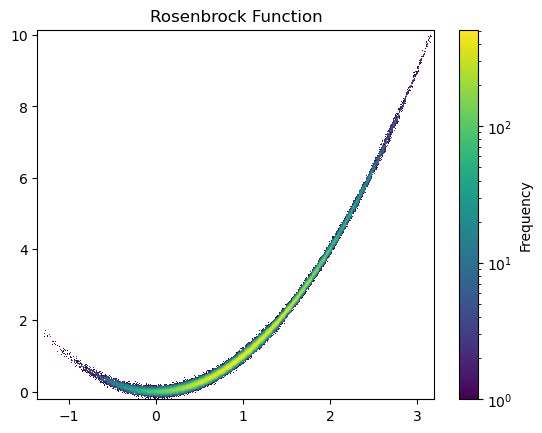

In [42]:
xMin = np.min(samples[:,0])
xMax = np.max(samples[:,0])
yMin = np.min(samples[:,1])
yMax = np.max(samples[:,1])
binWidth = 0.01
binLength = 0.01
plt.hist2d(samples[:,0], samples[:,1],
          bins = [np.arange(xMin, xMax, binWidth), np.arange(yMin, yMax, binLength)],
          norm = mpl.colors.LogNorm())
plt.colorbar(label='Frequency')
plt.title('Rosenbrock Function')